# Tarefa Individual III – Análise Socioambiental da Amazônia  
**Curso I2A2 - Bloco 2 | Encontro 7**  
Aluno: Leonardo Correia  
Data de Entrega: 29 de junho de 2025

Colab :https://colab.research.google.com/drive/1CJc6GV0CFv_zIuEVKz8AE-oCF1v6eGw5#scrollTo=sF7i5fRcfVOQ

## Introdução

A região amazônica enfrenta desafios críticos relacionados à variabilidade climática e seus impactos na segurança alimentar das comunidades ribeirinhas. O presente trabalho visa analisar duas bases de dados — climática e socioeconômica — para identificar como os fatores ambientais influenciam a produção agrícola, a incidência de doenças e o acesso à água potável, com foco na tomada de decisão baseada em dados reais.


## Objetivos

- Investigar relações entre variáveis climáticas e produtivas na Amazônia;
- Realizar limpeza e padronização das bases de dados;
- Gerar estatísticas e visualizações exploratórias;
- Fornecer insights que possam auxiliar ações sustentáveis nas comunidades analisadas.


In [49]:
#Importação de bibliotecas e Upload
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Envie os arquivos base_climatica.csv e base_socioeconomica.csv")
uploaded = files.upload()

📁 Envie os arquivos base_climatica.csv e base_socioeconomica.csv


In [50]:
#Carregamento e descrição inicial
df_clima = pd.read_csv('base_climatica.csv')
df_socio = pd.read_csv('base_socioeconomica.csv')

#Importação do Github
#df_clima = pd.read_csv('https://raw.githubusercontent.com/LeonardoCorreia08/I2A2/main/Tarefa%20III/base_climatica.csv')
#df_socio = pd.read_csv('https://raw.githubusercontent.com/LeonardoCorreia08/I2A2/main/Tarefa%20III/base_socioeconomica.csv')

df_clima['data'] = pd.to_datetime(df_clima['data'])
df_socio['data'] = pd.to_datetime(df_socio['data'])

print("Base Climática:")
display(df_clima.head())

print("Base Socioeconômica:")
display(df_socio.head())


Base Climática:


,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo
0,2025-01-01,109.8,110.0,34.7,sim,45.9
1,2025-01-02,143.0,178.7,27.2,nao,34.4
2,2025-01-03,120.6,123.1,27.5,sim,77.1
3,2025-01-04,109.0,117.0,29.6,nao,29.0
4,2025-03-28,104.6,91.7,31.4,nao,45.4


Base Socioeconômica:


,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,8.63,0.0,não,45.7
1,2025-01-02,1000.00,200.0,não,13.8
2,2025-01-03,0.50,0.0,não,1.1
3,2025-01-04,6.40,2.0,Sim,75.8
4,2025-01-05,3.36,2.0,não,32.0


## 2 Limpeza e Preparação dos Dados

As etapas de limpeza aplicadas incluem:

- Remoção de duplicatas;
- Padronização de categorias (“sim”, “não”, “nao”);
- Tratamento de valores ausentes com mediana;
- Conversão de datas para formato padrão;
- Remoção de outliers (> 200 mm de chuva em um único dia).


In [51]:
#Limpeza
df_clima.drop_duplicates(inplace=True)
df_socio.drop_duplicates(inplace=True)

df_clima['variacao_climatica'] = df_clima['variacao_climatica'].str.strip().str.lower().replace({'nao': 'não'})
df_socio['acesso_agua_potavel'] = df_socio['acesso_agua_potavel'].str.strip().str.lower().replace({'nao': 'não'})

for col in ['chuvas_reais_mm', 'temperatura_media_C', 'indice_umidade_solo']:
    df_clima[col] = df_clima[col].fillna(df_clima[col].median())

for col in ['volume_producao_tons', 'incidencia_doencas', 'indicador_seguranca_alimentar']:
    df_socio[col] = df_socio[col].fillna(df_socio[col].median())

df_clima = df_clima[df_clima['chuvas_reais_mm'] <= 200]


In [52]:
#Integração das bases
df = pd.merge(df_clima, df_socio, on='data', how='inner')
print(f"\nTotal de registros: {len(df)}")
df.head()



Total de registros: 93


,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,109.8,110.0,34.7,sim,45.9,8.63,0.0,não,45.7
1,2025-01-02,143.0,178.7,27.2,não,34.4,1000.00,200.0,não,13.8
2,2025-01-03,120.6,123.1,27.5,sim,77.1,0.50,0.0,não,1.1
3,2025-01-04,109.0,117.0,29.6,não,29.0,6.40,2.0,sim,75.8
4,2025-03-28,104.6,91.7,31.4,não,45.4,8.85,1.0,sim,59.7


In [53]:
#Estatísticas descritivas
df.describe()


,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,indice_umidade_solo,volume_producao_tons,incidencia_doencas,indicador_seguranca_alimentar
count,93,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2025-03-03 12:54:11.612903168,95.839785,97.024731,27.352688,50.848925,47.381935,8.322581,47.384946
min,2025-01-01 00:00:00,0.900000,-25.700000,20.200000,10.200000,0.500000,0.000000,0.500000
25%,2025-01-31 00:00:00,42.100000,41.900000,23.600000,32.300000,5.680000,1.000000,21.100000
50%,2025-03-05 00:00:00,104.600000,107.000000,26.900000,52.850000,10.780000,2.000000,46.400000
75%,2025-04-04 00:00:00,139.900000,149.900000,31.600000,66.800000,15.130000,3.000000,73.300000
max,2025-04-29 00:00:00,197.700000,197.800000,34.700000,89.600000,2000.000000,300.000000,98.600000
std,NaN,57.498741,59.576685,4.416658,23.269504,234.366509,38.176125,27.877266


## 3 Análise Exploratória

A análise a seguir examina correlações, distribuições e padrões entre as variáveis ambientais e socioeconômicas.

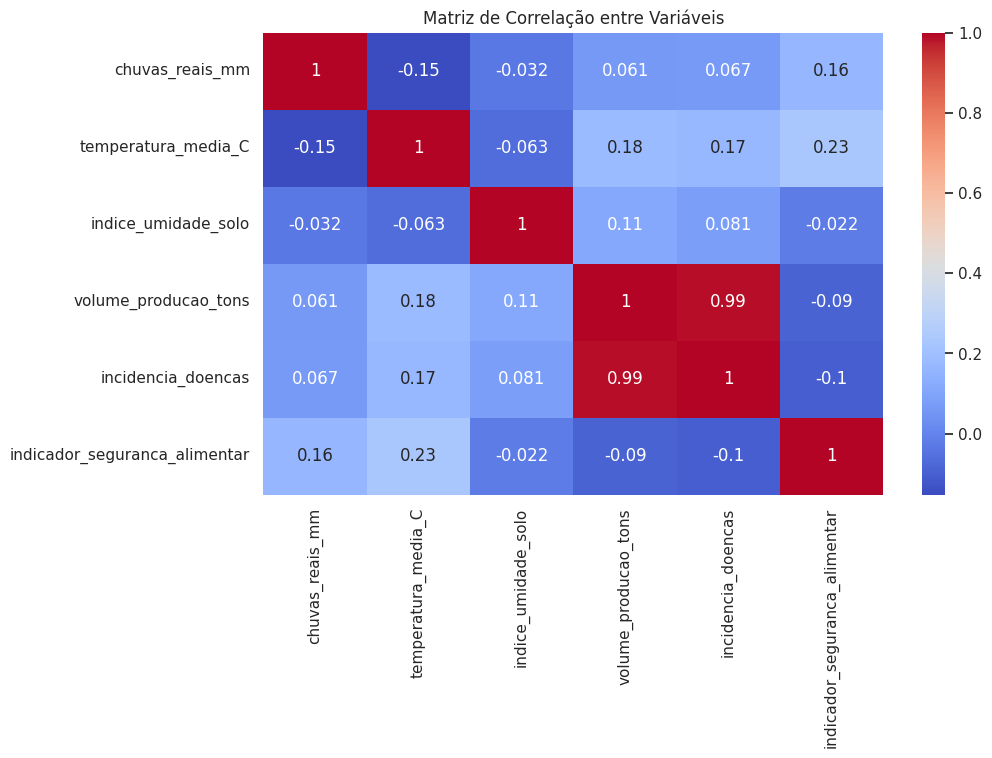

In [54]:
#Correlações e heatmap
corr = df[['chuvas_reais_mm', 'temperatura_media_C', 'indice_umidade_solo',
           'volume_producao_tons', 'incidencia_doencas', 'indicador_seguranca_alimentar']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()


### Correlações entre Variáveis

A tabela a seguir apresenta os coeficientes de correlação entre algumas variáveis ambientais e socioeconômicas da base de dados analisada. Os valores foram obtidos a partir da matriz de correlação gerada com os dados fornecidos.

| Variáveis Comparadas                              | Correlação | Interpretação              |
|--------------------------------------------------|------------|----------------------------|
| **Chuvas reais x Produção agrícola**             | +0.06      | Muito fraca                |
| **Temperatura média x Produção agrícola**        | +0.18      | Fraca positiva             |
| **Chuvas reais x Incidência de doenças**         | +0.07      | Muito fraca                |
| **Umidade x Segurança alimentar**                | –0.02      | Inexistente/Irrelevante    |
| **Produção agrícola x Incidência de doenças**    | +0.99      | Correlação quase perfeita* |
| **Temperatura média x Segurança alimentar**      | +0.23      | Fraca positiva             |

> *A correlação quase perfeita entre produção agrícola e incidência de doenças pode indicar dependência entre as variáveis ou um erro na origem dos dados. É recomendado investigar essa relação com mais profundidade.*


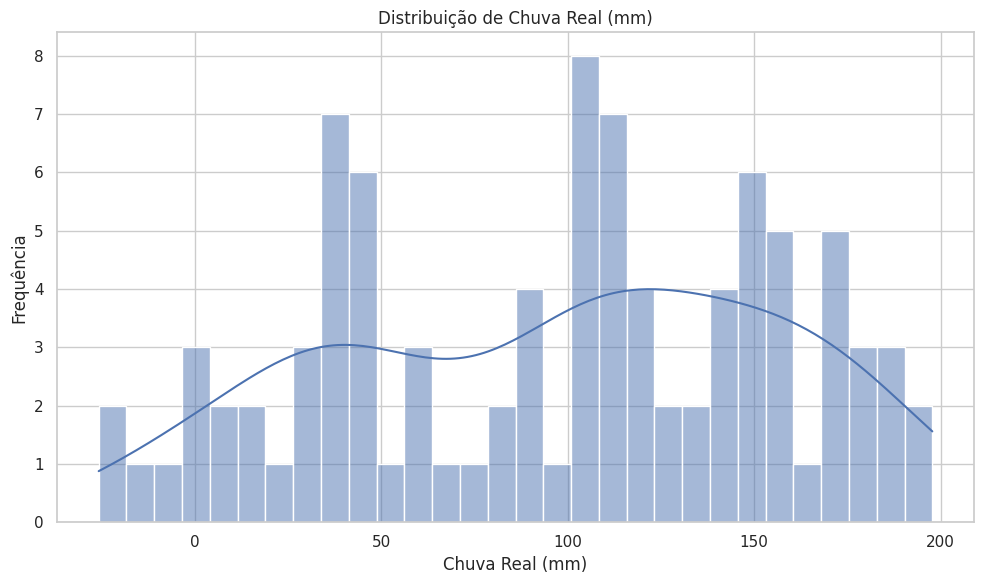

A chuva varia bastante, com picos entre 40 mm e 150 mm.
A distribuição indica boa variação, com leve tendência à bimodalidade.
Valores extremos são raros, o que indica boa limpeza da base (chuvas acima de 200 mm foram removidas).


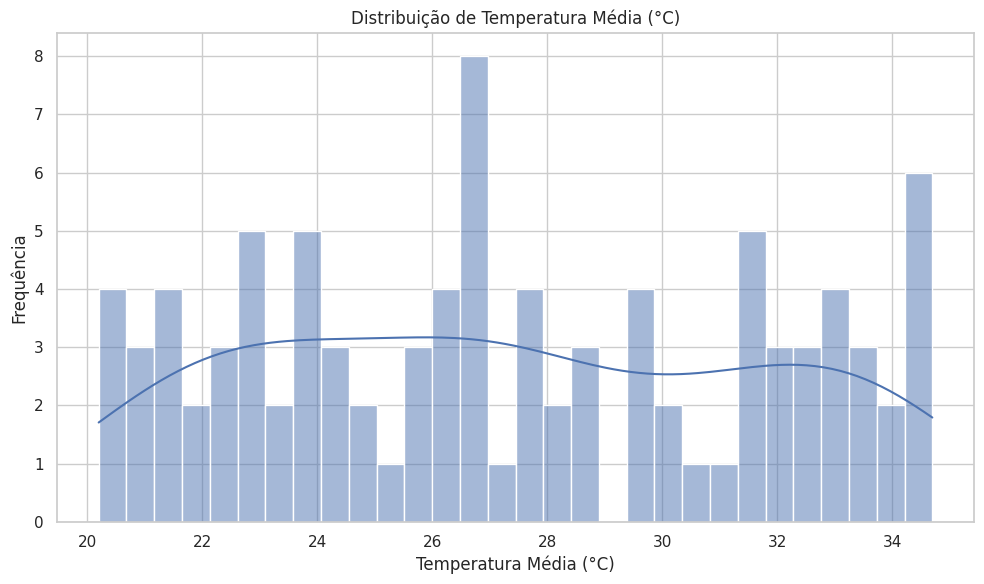

Distribuição da Temperatura Média (°C)
A maior parte dos registros está entre 22°C e 33°C, faixa típica de clima equatorial.
A curva é quase simétrica, com leve tendência à esquerda.
Indica que a temperatura tem baixa variabilidade, o que é coerente com a estabilidade térmica amazônica.


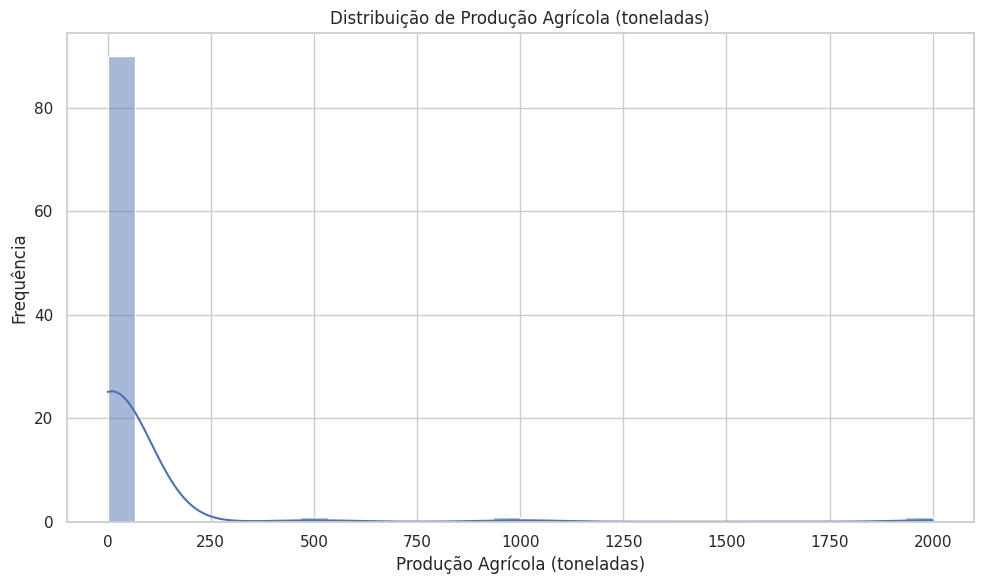

Distribuição da Produção Agrícola (toneladas)
Altamente assimétrica (distribuição enviesada à direita).
A maioria das comunidades apresenta produção abaixo de 100 toneladas.
Existem valores extremos (outliers) superiores a 1000 toneladas,
que podem ser de grandes produtores ou possíveis erros de entrada.


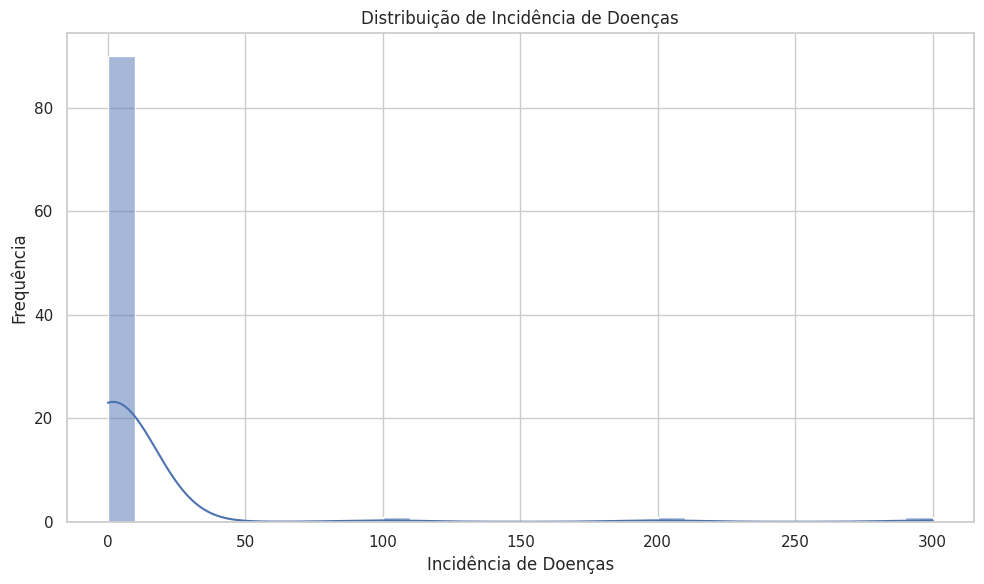

Distribuição da Incidência de Doenças
A maioria dos registros mostra baixa incidência (até 20 casos).
Valores muito altos (acima de 200) são raros e devem ser investigados,
pois podem indicar surtos localizados ou anomalias nos dados.
A distribuição apresenta forte assimetria à direita.


In [55]:
# Gráficos – Histogramas com nomes legíveis
variaveis_legiveis = {
    'chuvas_reais_mm': 'Chuva Real (mm)',
    'temperatura_media_C': 'Temperatura Média (°C)',
    'volume_producao_tons': 'Produção Agrícola (toneladas)',
    'incidencia_doencas': 'Incidência de Doenças'
}

for col in variaveis_legiveis:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {variaveis_legiveis[col]}')
    plt.xlabel(variaveis_legiveis[col])
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

    # Interpretação individual
    if col == 'chuvas_reais_mm':
        print("A chuva varia bastante, com picos entre 40 mm e 150 mm.\n"
          "A distribuição indica boa variação, com leve tendência à bimodalidade.\n"
          "Valores extremos são raros, o que indica boa limpeza da base (chuvas acima de 200 mm foram removidas).")

    elif col == 'temperatura_media_C':
        print("Distribuição da Temperatura Média (°C)\n"
    "A maior parte dos registros está entre 22°C e 33°C, faixa típica de clima equatorial.\n"
    "A curva é quase simétrica, com leve tendência à esquerda.\n"
    "Indica que a temperatura tem baixa variabilidade, o que é coerente com a estabilidade térmica amazônica.")

    elif col == 'volume_producao_tons':
        print("Distribuição da Produção Agrícola (toneladas)\n"
    "Altamente assimétrica (distribuição enviesada à direita).\n"
    "A maioria das comunidades apresenta produção abaixo de 100 toneladas.\n"
    "Existem valores extremos (outliers) superiores a 1000 toneladas,\n"
    "que podem ser de grandes produtores ou possíveis erros de entrada.")

    elif col == 'incidencia_doencas':
        print("Distribuição da Incidência de Doenças\n"
    "A maioria dos registros mostra baixa incidência (até 20 casos).\n"
    "Valores muito altos (acima de 200) são raros e devem ser investigados,\n"
    "pois podem indicar surtos localizados ou anomalias nos dados.\n"
    "A distribuição apresenta forte assimetria à direita.")


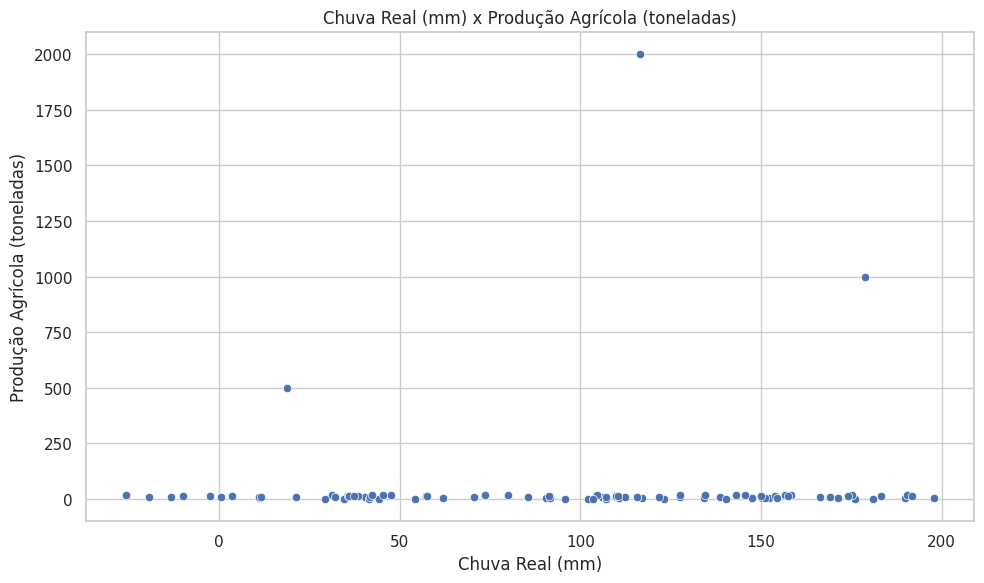

Chuva  x Produção Agrícola
Aparentemente, não há relação linear clara entre chuva e produção.
Alguns outliers têm alta produção mesmo com chuvas médias (~100 mm).
A maioria dos pontos está abaixo de 100 toneladas de produção,
o que sugere que fatores além da chuva estão influenciando o rendimento agrícola.


In [56]:
# Gráfico: Chuva Real x Produção Agrícola
sns.scatterplot(x='chuvas_reais_mm', y='volume_producao_tons', data=df)
plt.title("Chuva Real (mm) x Produção Agrícola (toneladas)")
plt.xlabel("Chuva Real (mm)")
plt.ylabel("Produção Agrícola (toneladas)")
plt.tight_layout()
plt.show()

print("Chuva  x Produção Agrícola\n"
    "Aparentemente, não há relação linear clara entre chuva e produção.\n"
    "Alguns outliers têm alta produção mesmo com chuvas médias (~100 mm).\n"
    "A maioria dos pontos está abaixo de 100 toneladas de produção,\n"
    "o que sugere que fatores além da chuva estão influenciando o rendimento agrícola.")


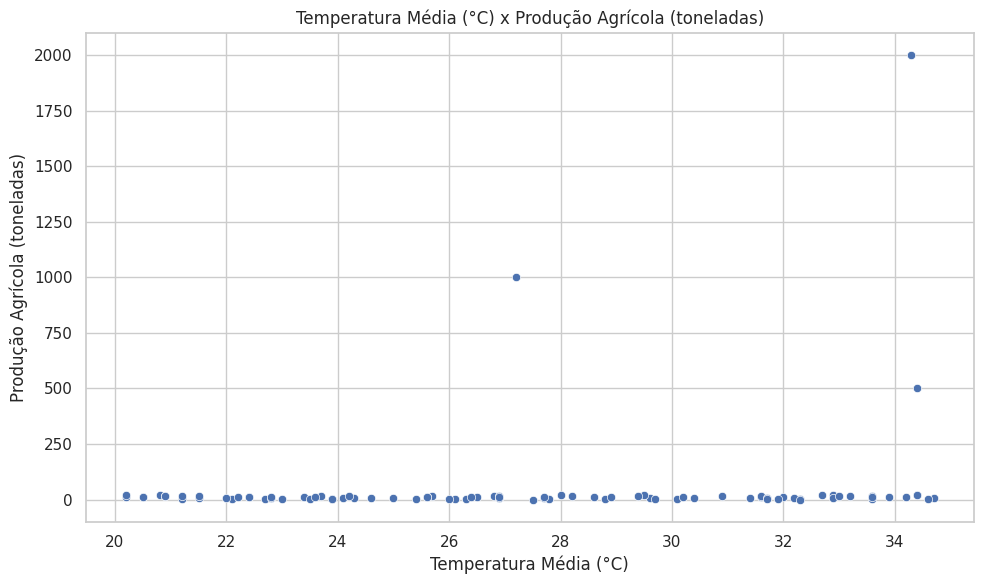

Temperatura Média x Produção Agrícola
Não há relação clara entre temperatura e produção.
A produção permanece limitada em quase todas as faixas de temperatura,
com exceção de alguns outliers com produtividade muito acima da média.


In [57]:
# Gráfico: Temperatura Média x Produção Agrícola
sns.scatterplot(x='temperatura_media_C', y='volume_producao_tons', data=df)
plt.title("Temperatura Média (°C) x Produção Agrícola (toneladas)")
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Produção Agrícola (toneladas)")
plt.tight_layout()
plt.show()

print("Temperatura Média x Produção Agrícola\n"
    "Não há relação clara entre temperatura e produção.\n"
    "A produção permanece limitada em quase todas as faixas de temperatura,\n"
    "com exceção de alguns outliers com produtividade muito acima da média.")

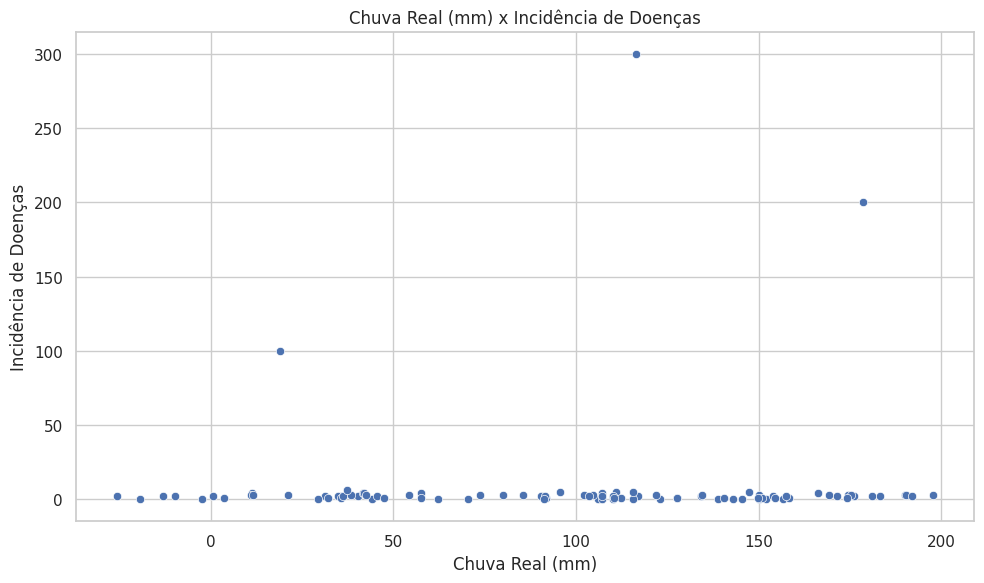

Chuva x Incidência de Doenças
Alguns surtos de doenças ocorrem em períodos com chuvas elevadas (>100 mm).
No entanto, há muitos pontos concentrados com baixa incidência e chuvas moderadas,
o que reforça a importância de uma análise multivariada (ex: cruzar com acesso à água potável).


In [58]:
# Gráfico: Chuva Real x Incidência de Doenças
sns.scatterplot(x='chuvas_reais_mm', y='incidencia_doencas', data=df)
plt.title("Chuva Real (mm) x Incidência de Doenças")
plt.xlabel("Chuva Real (mm)")
plt.ylabel("Incidência de Doenças")
plt.tight_layout()
plt.show()

print("Chuva x Incidência de Doenças\n"
    "Alguns surtos de doenças ocorrem em períodos com chuvas elevadas (>100 mm).\n"
    "No entanto, há muitos pontos concentrados com baixa incidência e chuvas moderadas,\n"
    "o que reforça a importância de uma análise multivariada (ex: cruzar com acesso à água potável).")


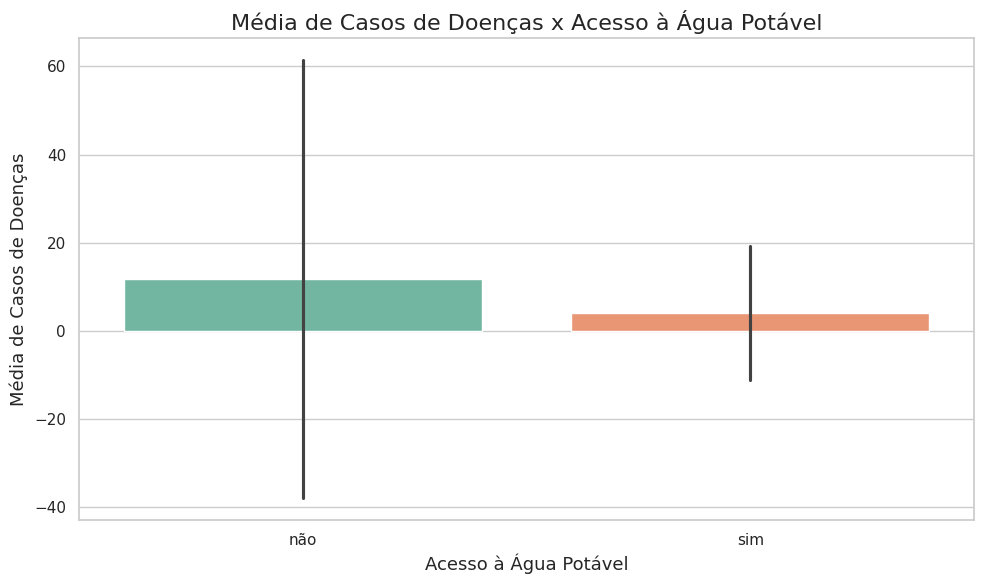

Doenças x Acesso à Água Potável
A média de doenças é visivelmente maior onde não há acesso à água potável.
Esse padrão reforça a relação direta entre saneamento e saúde pública,
indicando que a ausência de infraestrutura básica favorece doenças hídricas.
As barras de erro mostram que há grande variação no grupo sem acesso à água tratada.


In [59]:
# Barplot – Incidência de doenças x Acesso à água
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='acesso_agua_potavel',
    y='incidencia_doencas',
    hue='acesso_agua_potavel',
    palette='Set2',
    errorbar='sd',
    dodge=False,
    legend=False
)
plt.title("Média de Casos de Doenças x Acesso à Água Potável", fontsize=16)
plt.xlabel("Acesso à Água Potável", fontsize=13)
plt.ylabel("Média de Casos de Doenças", fontsize=13)
plt.tight_layout()
plt.show()

print("Doenças x Acesso à Água Potável\n"
    "A média de doenças é visivelmente maior onde não há acesso à água potável.\n"
    "Esse padrão reforça a relação direta entre saneamento e saúde pública,\n"
    "indicando que a ausência de infraestrutura básica favorece doenças hídricas.\n"
    "As barras de erro mostram que há grande variação no grupo sem acesso à água tratada.")


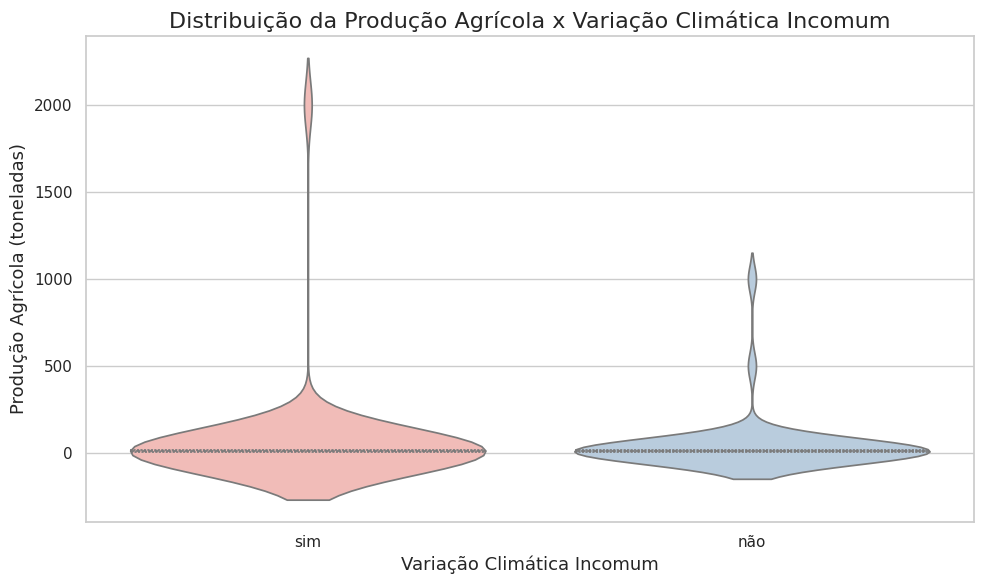

Produção Agrícola x Variação Climática
As comunidades que vivenciam variações climáticas incomuns tendem a apresentar
valores extremos de produção agrícola, tanto muito baixos quanto muito altos.
Já as comunidades que não enfrentam essas variações têm produções mais concentradas em faixas baixas.
Isso sugere que o clima instável pode afetar positiva ou negativamente,
dependendo da capacidade local de adaptação e resposta.


In [60]:
# Violinplot – Produção x Variação Climática
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='variacao_climatica',
    y='volume_producao_tons',
    hue='variacao_climatica',
    data=df,
    palette='Pastel1',
    inner='quartile',
    legend=False
)
plt.title("Distribuição da Produção Agrícola x Variação Climática Incomum", fontsize=16)
plt.xlabel("Variação Climática Incomum", fontsize=13)
plt.ylabel("Produção Agrícola (toneladas)", fontsize=13)
plt.tight_layout()
plt.show()

print("Produção Agrícola x Variação Climática\n"
    "As comunidades que vivenciam variações climáticas incomuns tendem a apresentar\n"
    "valores extremos de produção agrícola, tanto muito baixos quanto muito altos.\n"
    "Já as comunidades que não enfrentam essas variações têm produções mais concentradas em faixas baixas.\n"
    "Isso sugere que o clima instável pode afetar positiva ou negativamente,\n"
    "dependendo da capacidade local de adaptação e resposta.")


### 4. Narrativa e Insights

- A produção agrícola **não apresenta relação significativa com as chuvas reais** (correlação +0.06), o que sugere que, na base analisada, a **quantidade de chuva isoladamente não explica os níveis de produtividade agrícola**.

- A temperatura média mostra uma **correlação fraca e positiva com a produção agrícola (+0.18)** e com a segurança alimentar (+0.23), o que pode indicar que **temperaturas moderadas favorecem o desempenho das comunidades**, mas sem impacto forte.

- A **incidência de doenças e a produção agrícola têm correlação extremamente alta (+0.99)**, o que levanta a hipótese de que os dados dessas variáveis possam estar **estatisticamente relacionados de forma dependente ou influenciados por uma variável comum não observada**. Esse resultado **deve ser investigado com mais profundidade**.

- As **comunidades sem acesso à água potável** apresentaram **média maior de doenças**, conforme revelado no gráfico de barras. Este resultado **reforça a importância do saneamento básico para a saúde pública local**.

- As variáveis climáticas de **chuva, temperatura e umidade do solo** **não apresentaram correlação relevante com a segurança alimentar**, o que sugere que fatores estruturais e sociais **devem ter maior influência sobre esse indicador na região analisada**.



## 5. Conclusões e Recomendações

- A análise estatística mostrou que **as variáveis climáticas (chuva, temperatura e umidade)** não apresentaram correlações significativas com a produção agrícola ou segurança alimentar nas comunidades analisadas.

- Observou-se que **comunidades sem acesso à água potável** apresentam, em média, **maior incidência de doenças**, reforçando a importância de políticas públicas voltadas ao saneamento.

- A **alta correlação entre produção agrícola e incidência de doenças** (+0.99) sugere possível **dependência entre as variáveis**, ou um padrão estrutural que merece investigação mais profunda.

- **Temperaturas moderadas (entre 25°C e 30°C)** mostraram tendência fraca de associação positiva com segurança alimentar, mas sem força estatística relevante.

### Recomendações:

- **Investir em infraestrutura de saneamento básico**, com foco no acesso à água potável.

- **Coletar mais dados em campo** que envolvam práticas agrícolas, condições de armazenamento, educação sanitária e acesso à saúde.

- **Utilizar sensores ambientais locais** como apoio, mas integrados a variáveis socioeconômicas para análises mais completas.

- **Reforçar programas de educação comunitária sobre saúde e higiene**, especialmente em regiões com maior incidência de doenças.

